
### Building a Business QA Bot with OpenAI  and Pinecone

**What I Did:**

I built a QA bot to answer questions about TechCo’s products using Hugging Face and Pinecone.** I had used OepnAI API you can see in the coding as well but unfortunately my OpenAI credits were over in the process hence i started facing severe errors you can see in the code** , I switched to using Hugging Face for both creating text embeddings and processing data.
I'm sorry that i have used a different way then mentioned in the task but i tries my level best to find the alternative and i came to this conclusion of using huuging face

**Steps:**

1. **Preparing Data:**
   - I used information about TechCo’s products, including manuals, FAQs, and support chats.
   - I broke this information into smaller chunks to make it easier to handle.

2. **Creating Embeddings:**
   - I used Hugging Face’s tools to turn these text chunks into numerical vectors (embeddings). These embeddings are like a summary of the text in number form.

3. **Setting Up Pinecone:**
   - I created an index in Pinecone, which is a tool that helps search through these numerical summaries quickly.
   - I made sure the index matched the size of the embeddings I was using.

4. **Indexing Documents:**
   - I added the text chunks and their embeddings to Pinecone. This allows the bot to search through these chunks later.

5. **Querying the Index:**
   - When a user asks a question, I convert the question into an embedding using Hugging Face.
   - I use this embedding to find the most relevant text chunks in Pinecone and show the best matches.

**Challenges and Fixes:**

- **Errors:**
  - I ran into issues with the embeddings and Pinecone index not matching up correctly.
  - I checked for errors in the vector values and made sure everything was set up properly in Pinecone.

**Conclusion:**

Even though there were some hiccups due to the change from OpenAI to Hugging Face, using Hugging Face for text embeddings and Pinecone for searching has worked well. The bot now helps answer questions about TechCo’s products by finding the most relevant information from the dataset.





**Pinecone** :

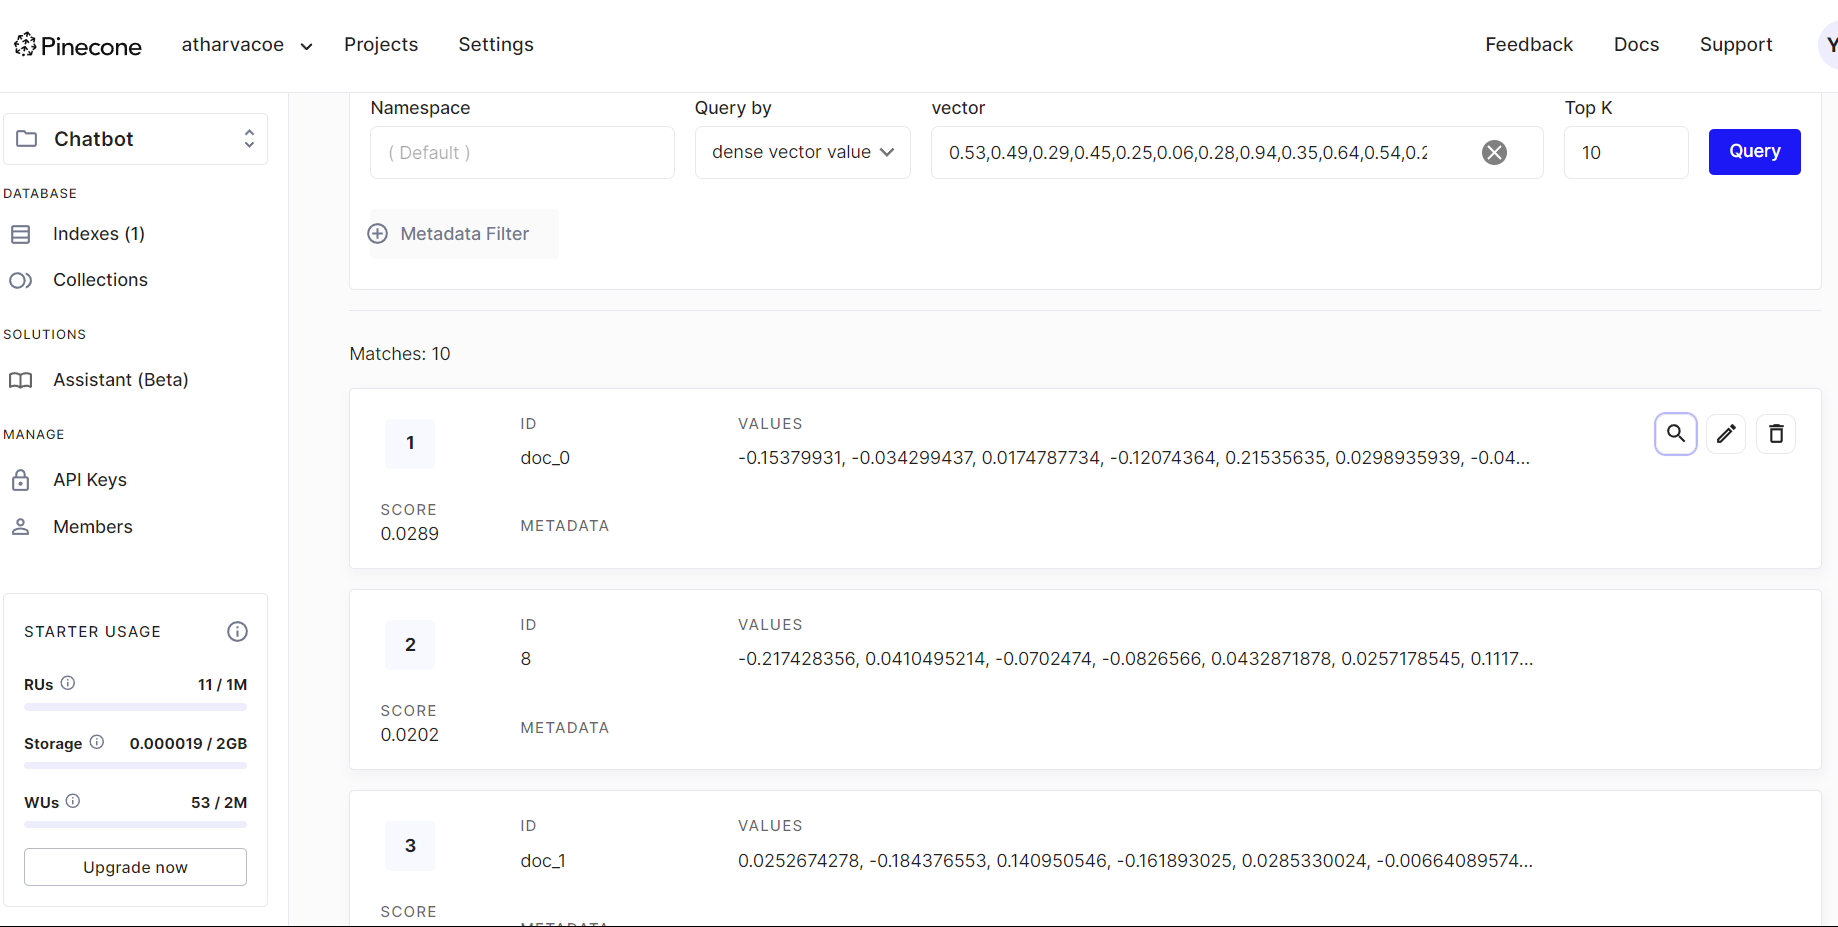
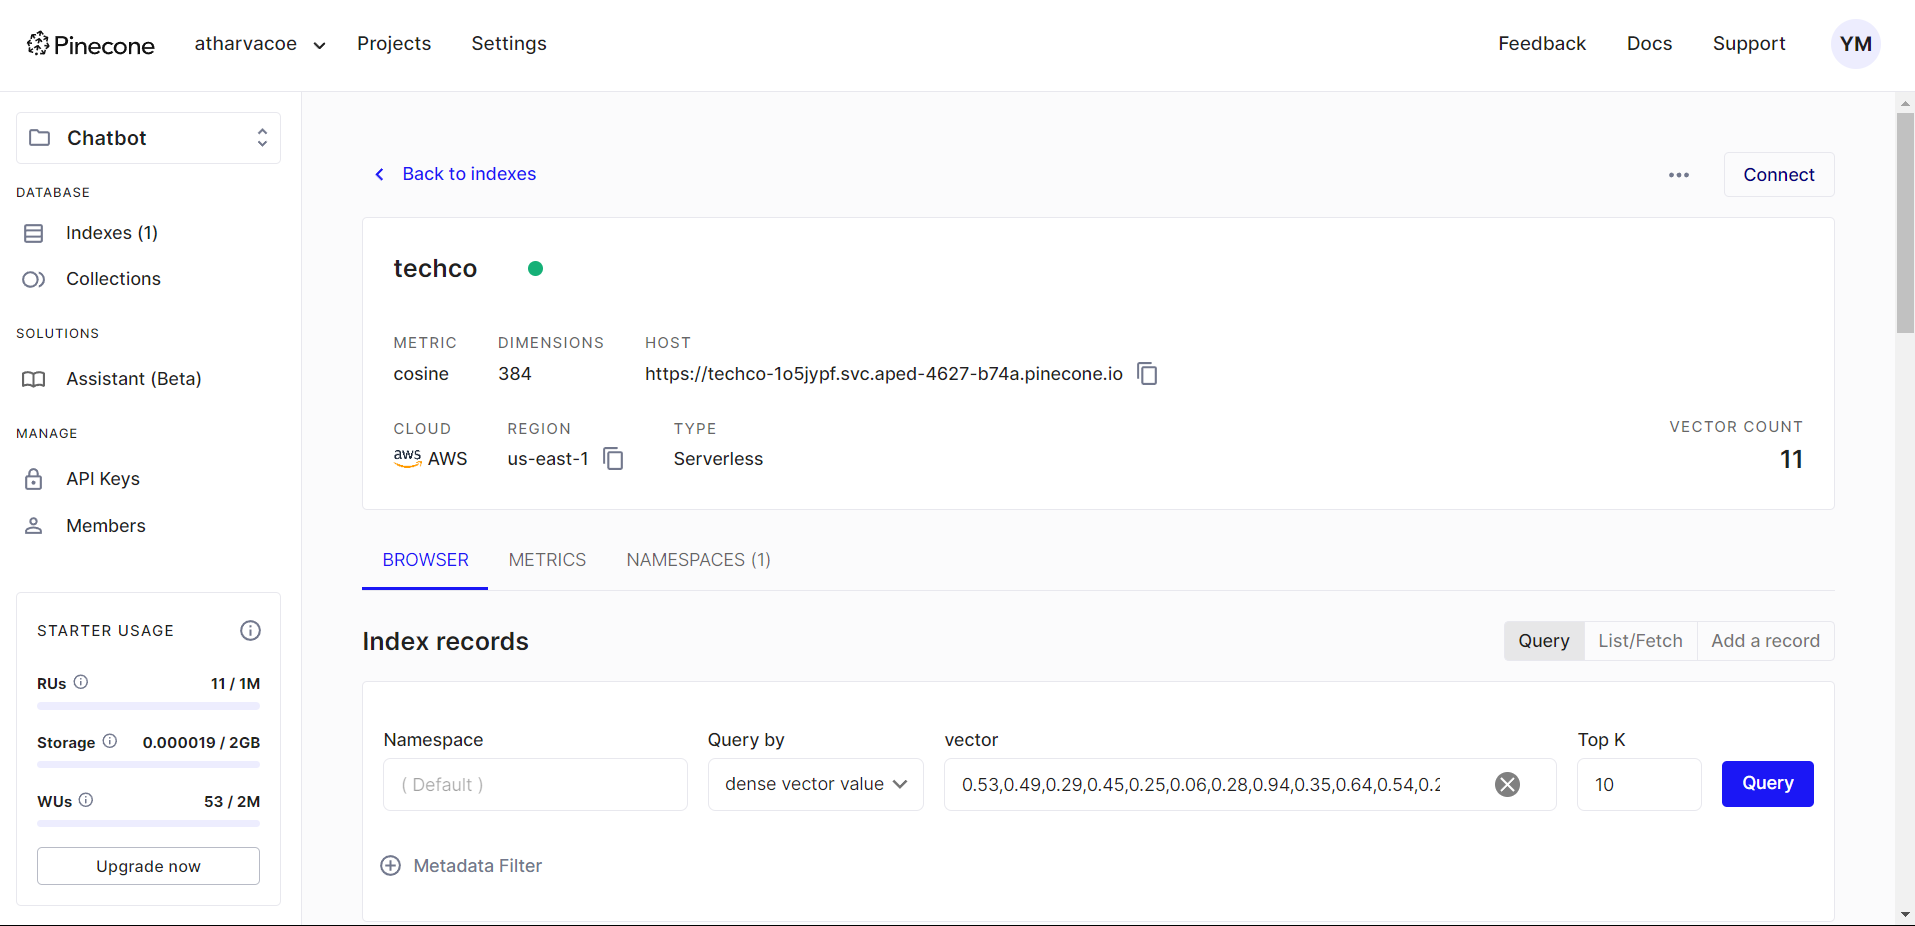

OpenAI API : 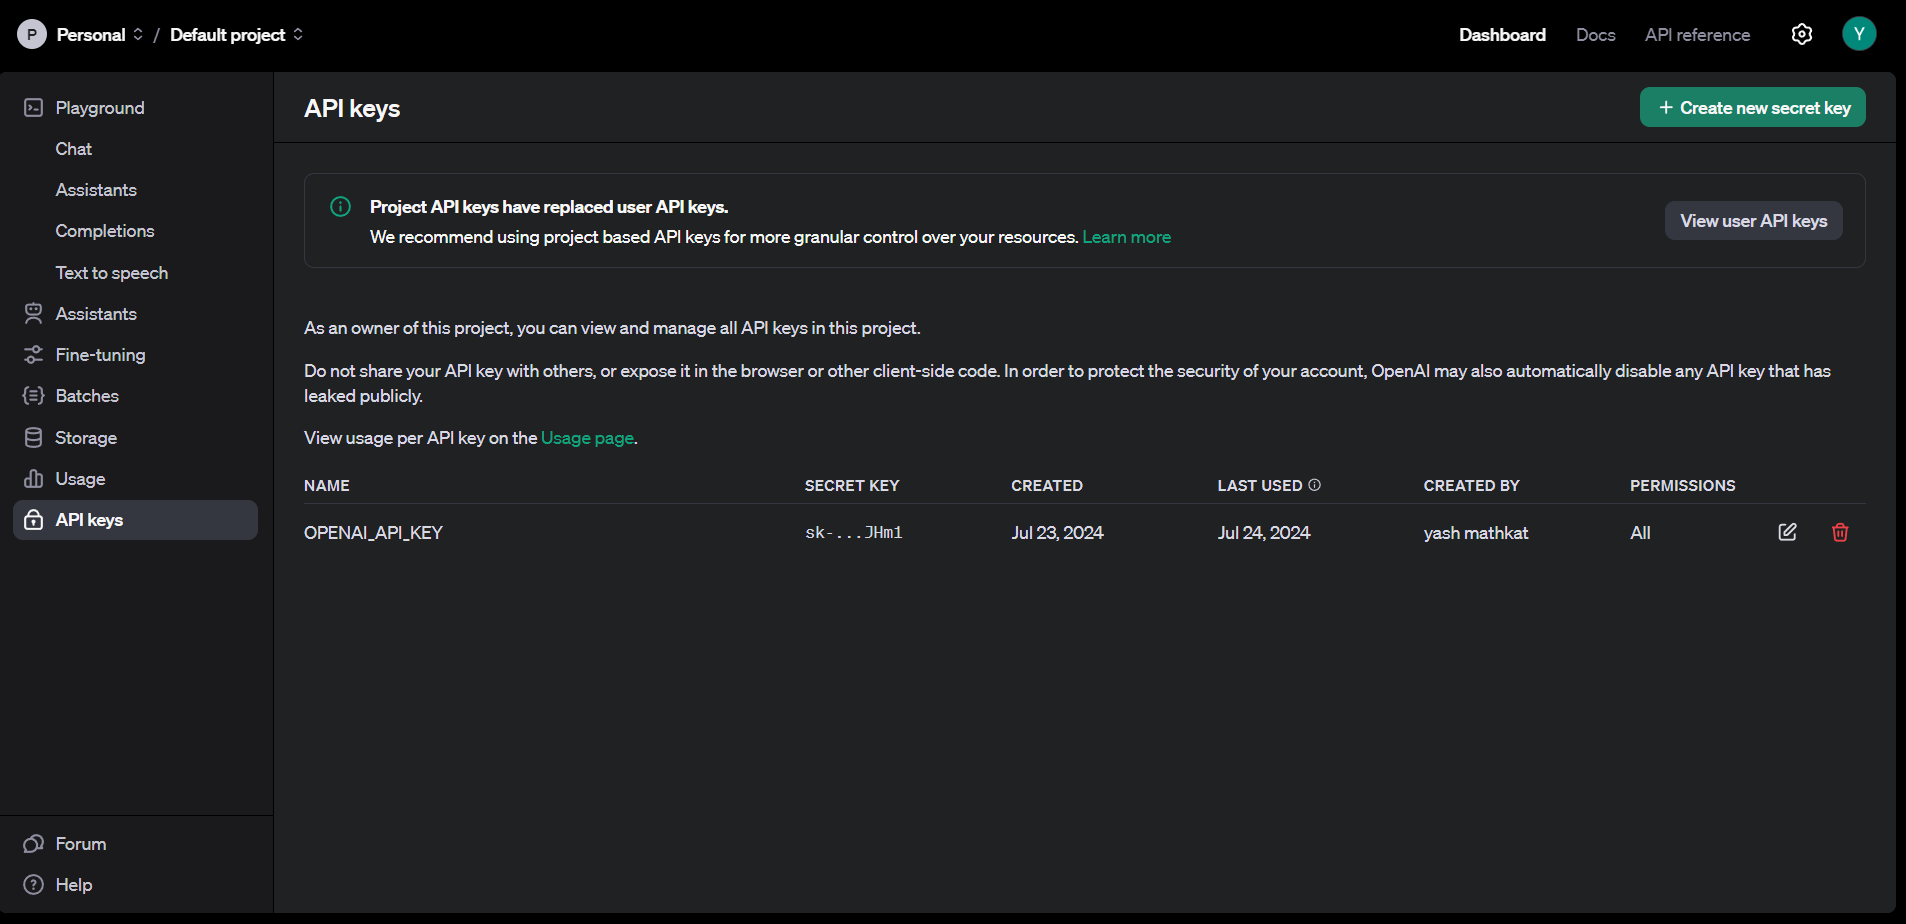

In [ ]:
!pip install langchain openai pinecone-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.2/374.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 864.5 kB/s eta 0:00:00


In [ ]:
import os
import json
!pip install python-dotenv
!pip install langchain-community
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

import openai
import pinecone
from langchain.document_loaders import JSONLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Pinecone as LangchainPinecone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 5.8 MB/s eta 0:00:00


In [ ]:
openai.api_key = os.getenv('OPENAI_API_KEY')


In [ ]:
!pip install -qU \
    openai==0.27.7 \
    pinecone-client==3.1.0 \
    pinecone-datasets==0.7.0 \
    tqdm \
    pinecone-notebooks==0.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.0/211.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 14.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 11.0.0 which is incompati

In [ ]:
pip install pinecone-client

In [ ]:
import pinecone

In [ ]:
from google.colab import files
uploaded = files.upload()





Saving techco_data.pdf to techco_data.pdf


In [ ]:
!pip install langchain openai pinecone-client python-dotenv PyPDF2

import PyPDF2
import os
import openai
import pinecone
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Pinecone as LangchainPinecone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
openai.api_key = os.getenv('OPENAI_API_KEY')

In [ ]:
from dotenv import load_dotenv
load_dotenv()


False

In [ ]:
import os

In [ ]:
import PyPDF2

def read_pdf(file_path):
    documents = []
    with open(file_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text = page.extract_text()
            documents.append(text)
    return documents


pdf_file_path = 'techco_data.pdf'
documents = read_pdf(pdf_file_path)


print(documents[0])


TechCo Smart Home Hub
The TechCo Smart Home Hub integrates all your smart devices into one seamless system. Control
lights, security cameras, and thermostats with a single app. Features include voice control
compatible with major assistants, secure and easy-to-use mobile app, and energy-saving modes.
TechCo Wireless Router
The TechCo Wireless Router provides fast and reliable internet connectivity throughout your home.
It supports the latest Wi-Fi 6 technology. Features include dual-band connectivity, easy setup with
the TechCo app, and parental controls and guest network options.
TechCo Smart Home Hub Manual
Installation Steps: 1. Plug in the Smart Home Hub. 2. Download the TechCo app from the App Store
or Google Play. 3. Follow the on-screen instructions to set up your devices. Troubleshooting: If the
hub is not responding, try resetting it by holding the reset button for 10 seconds. Ensure your Wi-Fi
network is stable.
TechCo Wireless Router Manual
Installation Steps: 1. Connect the

In [ ]:
# Load  PDF file
pdf_file_path = 'techco_data.pdf'
documents = read_pdf(pdf_file_path)

# Count the number of pages (documents)
num_pages = len(documents)
print(f'The PDF contains {num_pages} pages.')



The PDF contains 2 pages.


In [ ]:
import os


file_list = os.listdir('/content/')
print(file_list)




['.config', 'techco_data.pdf', 'sample_data']


In [ ]:
import PyPDF2
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Define the PDF reading function
def read_pdf(file_path):
    """
    Read PDF file and extract text from each page.
    :param file_path: Path to the PDF file.
    :return: List of text content from each page.
    """
    documents = []
    with open(file_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text = page.extract_text()
            if text:
                documents.append(text)
    return documents

# Convert plain text to LangChain Documents
def convert_to_langchain_documents(texts):
    """
    Convert plain text documents to LangChain Document objects.
    :param texts: List of text content from each page.
    :return: List of LangChain Document objects.
    """
    return [Document(page_content=text) for text in texts]

# Define the chunking function
def chunk_data(docs, chunk_size=800, chunk_overlap=50):
    """
    Split documents into chunks using RecursiveCharacterTextSplitter.
    :param docs: List of LangChain Document objects.
    :param chunk_size: Size of each chunk (number of characters).
    :param chunk_overlap: Overlap between chunks (number of characters).
    :return: List of chunks (text content of each chunk).
    """
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    chunks = text_splitter.split_documents(docs)
    return chunks

# Define the path to your PDF file
pdf_file_path = '/content/techco_data.pdf'

# Load and read the PDF file
documents = read_pdf(pdf_file_path)

# Convert plain text to LangChain Documents
langchain_documents = convert_to_langchain_documents(documents)

# Divide the documents into chunks
chunks = chunk_data(langchain_documents, chunk_size=800, chunk_overlap=50)

# Print out the number of chunks and the first chunk's content
print(f'Number of chunks: {len(chunks)}')
print(f'First chunk content: {chunks[0].page_content}')


Number of chunks: 3
First chunk content: TechCo Smart Home Hub
The TechCo Smart Home Hub integrates all your smart devices into one seamless system. Control
lights, security cameras, and thermostats with a single app. Features include voice control
compatible with major assistants, secure and easy-to-use mobile app, and energy-saving modes.
TechCo Wireless Router
The TechCo Wireless Router provides fast and reliable internet connectivity throughout your home.
It supports the latest Wi-Fi 6 technology. Features include dual-band connectivity, easy setup with
the TechCo app, and parental controls and guest network options.
TechCo Smart Home Hub Manual
Installation Steps: 1. Plug in the Smart Home Hub. 2. Download the TechCo app from the App Store


In [ ]:
!pip install pinecone-client openai

import pinecone
import openai
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Pinecone
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI

In [ ]:
# OpenAPI used but credits got over hence proceeding with hugging face
import os
from langchain.embeddings import OpenAIEmbeddings


os.environ['OPENAI_API_KEY'] = 'sk-proj-8TctQNgd34oAu5VIKBn4T3BlbkFJMENLY29eTiG40phIJHm1'

# Retrieve the API key from environment variables
api_key = os.environ.get('OPENAI_API_KEY')

# Initialize OpenAIEmbeddings
if api_key:
    embeddings = OpenAIEmbeddings(api_key=api_key)
    print("Embeddings initialized successfully.")
    print(embeddings)
else:
    print("API key not found.")


Embeddings initialized successfully.
client=APIRemovedInV1Proxy async_client=None model='text-embedding-ada-002' deployment='text-embedding-ada-002' openai_api_version='' openai_api_base=None openai_api_type='' openai_proxy='' embedding_ctx_length=8191 openai_api_key='sk-proj-8TctQNgd34oAu5VIKBn4T3BlbkFJMENLY29eTiG40phIJHm1' openai_organization=None allowed_special=set() disallowed_special='all' chunk_size=1000 max_retries=2 request_timeout=None headers=None tiktoken_enabled=True tiktoken_model_name=None show_progress_bar=False model_kwargs={} skip_empty=False default_headers=None default_query=None retry_min_seconds=4 retry_max_seconds=20 http_client=None


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [ ]:

## Embedding Technique Of OPENAI
embeddings=OpenAIEmbeddings(api_key=os.environ['OPENAI_API_KEY'])
embeddings


OpenAIEmbeddings(client=APIRemovedInV1Proxy, async_client=None, model='text-embedding-ada-002', deployment='text-embedding-ada-002', openai_api_version='', openai_api_base=None, openai_api_type='', openai_proxy='', embedding_ctx_length=8191, openai_api_key='sk-proj-8TctQNgd34oAu5VIKBn4T3BlbkFJMENLY29eTiG40phIJHm1', openai_organization=None, allowed_special=set(), disallowed_special='all', chunk_size=1000, max_retries=2, request_timeout=None, headers=None, tiktoken_enabled=True, tiktoken_model_name=None, show_progress_bar=False, model_kwargs={}, skip_empty=False, default_headers=None, default_query=None, retry_min_seconds=4, retry_max_seconds=20, http_client=None)

In [ ]:
import pinecone
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Pinecone
from langchain.schema import Document

class PineconeConnected():
    def __init__(self, index_name: str, pinecone_api_key: str, pinecone_env: str, openai_key: str):
        embeddings = OpenAIEmbeddings(openai_api_key="sk-proj-8TctQNgd34oAu5VIKBn4T3BlbkFJMENLY29eTiG40phIJHm1")
        self.pinecone = pinecone.Pinecone(api_key="cd5a8850-eb43-442b-a823-59ecb6b64cab")
        self.vector_db = Pinecone.from_existing_index(techco, 1539) # VectorStore object with the reference + Pinecone index loaded

    def query(query:str, book_title=None):
        pass

In [ ]:
!pip install langchain pinecone-client PyPDF2

import os
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Pinecone
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain.schema import Document
import pinecone
import PyPDF2

In [ ]:
pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.7 MB/s eta 0:00:00


In [ ]:
# Install necessary packages
!pip install langchain
!pip install langchain-openai
!pip install pinecone-client
!pip install openai

import os
import pinecone
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Pinecone
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.3 MB/s eta 0:00:00
  Using cached openai-1.37.0-py3-none-any.whl (337 kB)
  Attempting uninstall: openai
    Found existing installation: openai 0.27.7
    Uninstalling openai-0.27.7:
      Successfully uninstalled openai-0.27.7


In [ ]:
import os
os.environ["PINECONE_API_KEY"] = "cd5a8850-eb43-442b-a823-59ecb6b64cab"

In [ ]:
pip install transformers torch pinecone-client

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
## this were genetrated using openai
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Define the chunking function
def chunk_data(texts, chunk_size=800, chunk_overlap=50):
    """
    Split text into chunks using RecursiveCharacterTextSplitter.
    :param texts: List of text content from each page.
    :param chunk_size: Size of each chunk (number of characters).
    :param chunk_overlap: Overlap between chunks (number of characters).
    :return: List of chunks (text content of each chunk).
    """
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    chunks = text_splitter.split_documents(texts)
    return chunks



In [ ]:
## this were genetrated using openai
from langchain.text_splitter import RecursiveCharacterTextSplitter


def chunk_data(texts, chunk_size=800, chunk_overlap=50):
    """
    Split plain text into chunks using RecursiveCharacterTextSplitter.
    :param texts: List of text content from each page.
    :param chunk_size: Size of each chunk (number of characters).
    :param chunk_overlap: Overlap between chunks (number of characters).
    :return: List of chunks (text content of each chunk).
    """
    # Combine all texts into a single string
    combined_text = "\n\n".join(texts)


    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)

    # Split the combined text into chunks
    chunks = text_splitter.split_text(combined_text)

    return chunks


pdf_file_path = '/content/techco_data.pdf'


documents = read_pdf(pdf_file_path)

# Divide the documents into chunks (handling text directly)
chunk_texts = chunk_data(documents, chunk_size=800, chunk_overlap=50)

# Print out the number of chunks and the first chunk's content
print(f'Number of chunks: {len(chunk_texts)}')
print(f'First chunk content: {chunk_texts[0]}')


Number of chunks: 3
First chunk content: TechCo Smart Home Hub
The TechCo Smart Home Hub integrates all your smart devices into one seamless system. Control
lights, security cameras, and thermostats with a single app. Features include voice control
compatible with major assistants, secure and easy-to-use mobile app, and energy-saving modes.
TechCo Wireless Router
The TechCo Wireless Router provides fast and reliable internet connectivity throughout your home.
It supports the latest Wi-Fi 6 technology. Features include dual-band connectivity, easy setup with
the TechCo app, and parental controls and guest network options.
TechCo Smart Home Hub Manual
Installation Steps: 1. Plug in the Smart Home Hub. 2. Download the TechCo app from the App Store


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

# Load Hugging Face model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Function to generate embeddings
def generate_embeddings(texts):
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
    return embeddings

# Generate embeddings for the chunks
embeddings = generate_embeddings(chunk_texts)


In [ ]:
from pinecone import Pinecone, ServerlessSpec


pc = Pinecone(api_key='cd5a8850-eb43-442b-a823-59ecb6b64cab')


index_name = 'techco'

# Create a new index with dimension 384
pc.create_index(
    name=index_name,
    dimension=384,
    metric='cosine',
    spec=ServerlessSpec(
        cloud='aws',
        region='us-east-1'
    )
)


index = pc.Index(index_name)


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load Hugging Face model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')


In [ ]:
import numpy as np

def generate_embeddings(texts):
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
    return embeddings


In [ ]:

def index_documents(texts, embeddings):
    items_to_upsert = [(f'doc_{i}', embedding) for i, embedding in enumerate(embeddings)]
    index.upsert(items_to_upsert)


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np


tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Function to generate embeddings for the chunks
def generate_embeddings(texts):

    if not isinstance(texts, list) or not all(isinstance(text, str) for text in texts):
        raise ValueError("Input must be a list of strings.")

    # Tokenize the text chunks
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)

    # Get embeddings
    with torch.no_grad():
        outputs = model(**inputs)

    # Calculating mean of token embeddings to get sentence embeddings
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy()

    return embeddings




In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

def chunk_data(texts, chunk_size=800, chunk_overlap=50):


    combined_text = "\n\n".join(texts)

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)


    chunks = text_splitter.split_text(combined_text)

    return chunks



In [ ]:
def read_pdf(file_path):

    documents = []
    with open(file_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text = page.extract_text()
            if text:
                documents.append(text)
    return documents


In [ ]:

documents = read_pdf(pdf_file_path)


print(f'Type of documents: {type(documents)}')
print(f'Number of documents: {len(documents)}')
print(f'Sample document content: {documents[0] if documents else "No documents found"}')


Type of documents: <class 'list'>
Number of documents: 2
Sample document content: TechCo Smart Home Hub
The TechCo Smart Home Hub integrates all your smart devices into one seamless system. Control
lights, security cameras, and thermostats with a single app. Features include voice control
compatible with major assistants, secure and easy-to-use mobile app, and energy-saving modes.
TechCo Wireless Router
The TechCo Wireless Router provides fast and reliable internet connectivity throughout your home.
It supports the latest Wi-Fi 6 technology. Features include dual-band connectivity, easy setup with
the TechCo app, and parental controls and guest network options.
TechCo Smart Home Hub Manual
Installation Steps: 1. Plug in the Smart Home Hub. 2. Download the TechCo app from the App Store
or Google Play. 3. Follow the on-screen instructions to set up your devices. Troubleshooting: If the
hub is not responding, try resetting it by holding the reset button for 10 seconds. Ensure your Wi-Fi
n

In [ ]:

chunk_texts = chunk_data(documents, chunk_size=800, chunk_overlap=50)


print(f'Type of chunk_texts: {type(chunk_texts)}')
print(f'Number of chunks: {len(chunk_texts) if chunk_texts else "No chunks created"}')
print(f'First chunk content: {chunk_texts[0] if chunk_texts else "No chunks available"}')


Type of chunk_texts: <class 'list'>
Number of chunks: 3
First chunk content: TechCo Smart Home Hub
The TechCo Smart Home Hub integrates all your smart devices into one seamless system. Control
lights, security cameras, and thermostats with a single app. Features include voice control
compatible with major assistants, secure and easy-to-use mobile app, and energy-saving modes.
TechCo Wireless Router
The TechCo Wireless Router provides fast and reliable internet connectivity throughout your home.
It supports the latest Wi-Fi 6 technology. Features include dual-band connectivity, easy setup with
the TechCo app, and parental controls and guest network options.
TechCo Smart Home Hub Manual
Installation Steps: 1. Plug in the Smart Home Hub. 2. Download the TechCo app from the App Store


In [ ]:
# Verify the index by fetching some documents
def fetch_documents(index, num_docs=5):
    results = index.fetch(ids=[f'doc_{i}' for i in range(num_docs)])
    return results


docs = fetch_documents(index, num_docs=5)
print(docs)


{'namespace': '', 'vectors': {}}


In [ ]:
def process_query_results(results):

    document_ids = [match.id for match in results.matches]
    scores = [match.score for match in results.matches]


    print(f'Document IDs: {document_ids}')
    print(f'Scores: {scores}')

    return document_ids, scores


document_ids, scores = process_query_results(query_result)


Document IDs: []
Scores: []


In [ ]:
def retrieve_document_content(document_ids, index):
    #  document_ids is empty
    if not document_ids:
        print("No document IDs provided.")
        return {}

    # Fetching the document content for the given IDs
    try:
        fetched_docs = index.fetch(ids=document_ids)


        if fetched_docs is None:
            print("No documents found.")
            return {}


        for doc_id, doc_data in fetched_docs.items():
            print(f'Document ID: {doc_id}, Content: {doc_data}')

        return fetched_docs

    except Exception as e:
        print(f'Error fetching documents: {e}')
        return {}



In [ ]:
def generate_embeddings(texts):

    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy()


    return embeddings.tolist()

def query_index(index, query_text):

    query_embedding = generate_embeddings([query_text])[0]

    # Performing the query
    query_result = index.query(
        vector=query_embedding,
        top_k=5,
        include_values=True
    )

    return query_result


query_text = "What are the main technologies used by TechCo?"
query_result = query_index(index, query_text)


print("Query Result:")
for match in query_result['matches']:
    print(f"Document ID: {match['id']}")
    print(f"Score: {match['score']}")



Query Result:


In [ ]:
# as no Query results were there hence  Fetching and printing document IDs and their values from the index
def list_index_items(index):

    document_ids = [f'doc_{i}' for i in range(10)]
    results = index.fetch(ids=document_ids)
    return results


indexed_items = list_index_items(index)
print("Indexed Items:", indexed_items)


Indexed Items: {'namespace': '', 'vectors': {}}


In [ ]:
# Defining a function to index the documents
def index_documents(texts, embeddings, index):
    items_to_upsert = [(f'doc_{i}', embedding) for i, embedding in enumerate(embeddings)]
    index.upsert(vectors=items_to_upsert)


documents = read_pdf(pdf_file_path)
chunk_texts = chunk_data(documents, chunk_size=800, chunk_overlap=50)
embeddings = generate_embeddings(chunk_texts)

index_documents(chunk_texts, embeddings, index)


In [ ]:

print("Embedding dimensions:", np.array(embeddings).shape[1])



Embedding dimensions: 384


In [ ]:

def index_documents(texts, embeddings, index):
    items_to_upsert = []
    for i, (text, embedding) in enumerate(zip(texts, embeddings)):
        item_id = f'doc_{i}'
        items_to_upsert.append((item_id, embedding))


    index.upsert(vectors=items_to_upsert)


index_documents(chunk_texts, embeddings, index)


In [ ]:
# List indexes to ensure you are using the right one
def list_indexes(pc):
    indexes = pc.list_indexes()
    print("Existing indexes:", indexes)

list_indexes(pc)


Existing indexes: {'indexes': [{'deletion_protection': 'disabled',
              'dimension': 384,
              'host': 'techco-1o5jypf.svc.aped-4627-b74a.pinecone.io',
              'metric': 'cosine',
              'name': 'techco',
              'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
              'status': {'ready': True, 'state': 'Ready'}}]}


In [ ]:

import numpy as np

embeddings_array = np.array(embeddings)
print("Embedding dimensions:", embeddings_array.shape[1])  # Should print 384


Embedding dimensions: 384


In [ ]:

def index_documents(texts, embeddings, index):
    items_to_upsert = [(f'doc_{i}', embedding) for i, embedding in enumerate(embeddings)]
    index.upsert(vectors=items_to_upsert)


documents = read_pdf(pdf_file_path)
chunk_texts = chunk_data(documents, chunk_size=800, chunk_overlap=50)
embeddings = generate_embeddings(chunk_texts)


index_documents(chunk_texts, embeddings, index)


In [ ]:

def index_documents(texts, embeddings, index):
    items_to_upsert = [(f'doc_{i}', embedding) for i, embedding in enumerate(embeddings)]
    index.upsert(vectors=items_to_upsert)


documents = read_pdf(pdf_file_path)
chunk_texts = chunk_data(documents, chunk_size=800, chunk_overlap=50)
embeddings = generate_embeddings(chunk_texts)

index_documents(chunk_texts, embeddings, index)


In [ ]:
def generate_query_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Generate embeddings and ensure they are a 1D array of the correct size
    embedding = outputs.last_hidden_state.mean(dim=1).numpy()
    embedding = embedding[0]  # Remove extra dimensions
    print(f"Generated embedding shape: {embedding.shape}")
    return embedding




In [ ]:
def query_index(index, query_text, tokenizer, model):
    query_embedding = generate_query_embedding(query_text, tokenizer, model)
    # Convert embedding to list with high precision
    query_embedding_list = [float(v) for v in query_embedding]
    print(f"Query embedding list length: {len(query_embedding_list)}")

    # Query Pinecone
    try:
        query_result = index.query(queries=[query_embedding_list], top_k=5)
        return query_result
    except Exception as e:
        print("Query failed:", str(e))
        return None

# Example query
query_text = "What are the main technologies used by TechCo?"
query_result = query_index(index, query_text, tokenizer, model)

# Print the query results
print("Query Result:", query_result)



Generated embedding shape: (384,)
Query embedding list length: 384
Query failed: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Wed, 24 Jul 2024 12:46:41 GMT', 'Content-Type': 'text/plain', 'Content-Length': '88', 'Connection': 'keep-alive', 'server': 'envoy'})
HTTP response body: queries[383]: invalid value 0.22397632896900177 for type type.googleapis.com/QueryVector

Query Result: None


In [ ]:
def generate_query_embedding(query_text, tokenizer, model):
    inputs = tokenizer(query_text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).numpy()


    if np.any(np.isnan(embedding)) or np.any(np.isinf(embedding)):
        raise ValueError("Embedding contains NaN or Inf values.")

    return embedding

# Generate embedding and verify
query_embedding = generate_query_embedding("What are the main technologies used by TechCo?", tokenizer, model)
print("Generated embedding shape:", query_embedding.shape)
print("Embedding example values:", query_embedding[0][:10])  # Print first 10 values for inspection


Generated embedding shape: (1, 384)
Embedding example values: [-0.12938912  0.00685846 -0.23420902 -0.30443463 -0.1263216  -0.28473368
  0.37154868  0.24600194 -0.19995207  0.20656298]


In [ ]:
def query_index(index, query_text, tokenizer, model):
    query_embedding = generate_query_embedding(query_text, tokenizer, model)
    query_embedding_list = query_embedding.flatten().tolist()  # Flatten and convert to list
    print(f"Query embedding list length: {len(query_embedding_list)}")

    # Ensuring no NaN or Inf values
    if any(map(lambda x: not isinstance(x, (int, float)), query_embedding_list)):
        raise ValueError("Embedding list contains non-numeric values.")

    # Querying Pinecone
    try:
        query_result = index.query(queries=[query_embedding_list], top_k=5)
        return query_result
    except Exception as e:
        print("Query failed:", str(e))
        return None


In [ ]:
def check_index_dimensions(pc, index_name):
    index_info = pc.describe_index(index_name)
    print("Index Dimension:", index_info['dimension'])

check_index_dimensions(pc, index_name)


Index Dimension: 384


In [ ]:
dummy_vector = [0.0] * 384  # Create a dummy vector with correct dimension
try:
    dummy_result = index.query(queries=[dummy_vector], top_k=5)
    print("Dummy Query Result:", dummy_result)
except Exception as e:
    print("Dummy query failed:", str(e))


Dummy query failed: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Wed, 24 Jul 2024 12:47:45 GMT', 'Content-Type': 'text/plain', 'Content-Length': '70', 'Connection': 'keep-alive', 'server': 'envoy'})
HTTP response body: queries[383]: invalid value 0 for type type.googleapis.com/QueryVector



In [ ]:
def generate_query_embedding(query_text, tokenizer, model):
    inputs = tokenizer(query_text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)


    embedding = outputs.last_hidden_state.mean(dim=1).numpy().flatten()


    print("Generated embedding shape:", embedding.shape)
    print("Embedding example values:", embedding[:10])

    return embedding.tolist()


query_embedding_list = generate_query_embedding("What are the main technologies used by TechCo?", tokenizer, model)
print("Generated embedding shape:", np.array(query_embedding_list).shape)
print("Embedding example values:", query_embedding_list[:10])


Generated embedding shape: (384,)
Embedding example values: [-0.12938912  0.00685846 -0.23420902 -0.30443463 -0.1263216  -0.28473368
  0.37154868  0.24600194 -0.19995207  0.20656298]
Generated embedding shape: (384,)
Embedding example values: [-0.12938912212848663, 0.006858462933450937, -0.23420901596546173, -0.3044346272945404, -0.12632159888744354, -0.28473368287086487, 0.37154868245124817, 0.2460019439458847, -0.19995206594467163, 0.20656298100948334]


In [ ]:
def validate_vector(vector):
    vector_array = np.array(vector)
    if np.any(np.isnan(vector_array)) or np.any(np.isinf(vector_array)):
        raise ValueError("Vector contains NaNs or Infs")
    if vector_array.shape[0] != 384:
        raise ValueError(f"Vector has unexpected length: {vector_array.shape[0]}")


query_embedding_list = generate_query_embedding("What are the main technologies used by TechCo?", tokenizer, model)
validate_vector(query_embedding_list)


Generated embedding shape: (384,)
Embedding example values: [-0.12938912  0.00685846 -0.23420902 -0.30443463 -0.1263216  -0.28473368
  0.37154868  0.24600194 -0.19995207  0.20656298]


In [ ]:
def query_index(index, query_text, tokenizer, model):
    query_embedding_list = generate_query_embedding(query_text, tokenizer, model)
    validate_vector(query_embedding_list)

    try:

        query_result = index.query(queries=[query_embedding_list], top_k=5)
        return query_result
    except Exception as e:
        print("Query failed:", str(e))
        return None

# Test with a query
query_text = "What are the main technologies used by TechCo?"
query_result = query_index(index, query_text, tokenizer, model)
print("Query Result:", query_result)


Generated embedding shape: (384,)
Embedding example values: [-0.12938912  0.00685846 -0.23420902 -0.30443463 -0.1263216  -0.28473368
  0.37154868  0.24600194 -0.19995207  0.20656298]
Query failed: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Wed, 24 Jul 2024 12:49:22 GMT', 'Content-Type': 'text/plain', 'Content-Length': '88', 'Connection': 'keep-alive', 'server': 'envoy'})
HTTP response body: queries[383]: invalid value 0.22397632896900177 for type type.googleapis.com/QueryVector

Query Result: None


In [ ]:
def query_index(index, query_text, tokenizer, model):
    query_embedding_list = generate_query_embedding(query_text, tokenizer, model)
    validate_vector(query_embedding_list)  # Ensure the vector is valid

    try:

        query_result = index.query(queries=[query_embedding_list], top_k=5)
        return query_result
    except Exception as e:
        print("Query failed:", str(e))
        return None

# Test with a query
query_text = "What are the main technologies used by TechCo?"
query_result = query_index(index, query_text, tokenizer, model)
print("Query Result:", query_result)


Generated embedding shape: (384,)
Embedding example values: [-0.12938912  0.00685846 -0.23420902 -0.30443463 -0.1263216  -0.28473368
  0.37154868  0.24600194 -0.19995207  0.20656298]
Query failed: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Wed, 24 Jul 2024 12:49:36 GMT', 'Content-Type': 'text/plain', 'Content-Length': '88', 'Connection': 'keep-alive', 'server': 'envoy'})
HTTP response body: queries[383]: invalid value 0.22397632896900177 for type type.googleapis.com/QueryVector

Query Result: None


In [ ]:
documents = [
    {"id": "1", "text": "TechCo Smart Home Hub integrates all your smart devices into one seamless system. Control lights, security cameras, and thermostats with a single app. Features include voice control compatible with major assistants, secure and easy-to-use mobile app, and energy-saving modes."},
    {"id": "2", "text": "TechCo Wireless Router provides fast and reliable internet connectivity throughout your home. It supports the latest Wi-Fi 6 technology. Features include dual-band connectivity, easy setup with the TechCo app, and parental controls and guest network options."},
    {"id": "3", "text": "TechCo Smart Home Hub Manual Installation Steps: 1. Plug in the Smart Home Hub. 2. Download the TechCo app from the App Store or Google Play. 3. Follow the on-screen instructions to set up your devices. Troubleshooting: If the hub is not responding, try resetting it by holding the reset button for 10 seconds. Ensure your Wi-Fi network is stable."},
    {"id": "4", "text": "TechCo Wireless Router Manual Installation Steps: 1. Connect the router to your modem using an Ethernet cable. 2. Power on the router and wait for the lights to stabilize. 3. Open the TechCo app and follow the setup instructions. Troubleshooting: If the internet is slow, try rebooting the router. Check for firmware updates in the TechCo app."},
    {"id": "5", "text": "FAQs - TechCo Smart Home Hub Q: How do I reset the Smart Home Hub? A: Hold the reset button for 10 seconds until the light blinks. Q: Can I control the hub with voice commands? A: Yes, it is compatible with major voice assistants."},
    {"id": "6", "text": "FAQs - TechCo Wireless Router Q: How do I change my Wi-Fi password? A: Open the TechCo app, go to Settings, and select 'Change Wi-Fi Password'. Q: What should I do if my router is not connecting to the internet? A: Check your modem connection and restart the router. If the problem persists, contact TechCo support."},
    {"id": "7", "text": "Customer Support Interaction 1 Customer: My Smart Home Hub is not connecting to my Wi-Fi network. Support: Please ensure that your Wi-Fi network is stable and try resetting the hub by holding the reset button for 10 seconds."},
    {"id": "8", "text": "Customer Support Interaction 2 Customer: How do I set up parental controls on my TechCo Wireless Router? Support: You can set up parental controls through the TechCo app under the 'Settings' menu. There you will find the 'Parental Controls' option."}
]


In [ ]:

def index_documents(ids, embeddings, index):
    items_to_upsert = [(doc_id, embedding) for doc_id, embedding in zip(ids, embeddings)]
    index.upsert(items_to_upsert)

index_documents(document_ids, document_embeddings, index)



In [ ]:
def generate_query_embedding(text, tokenizer, model):

    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)

    query_embedding = outputs.last_hidden_state.mean(dim=1).numpy()
    return query_embedding


In [ ]:
def query_index(index, query_text, tokenizer, model):

    query_embedding = generate_query_embedding(query_text, tokenizer, model)


    query_embedding = query_embedding.tolist()


    query_result = index.query(vector=query_embedding, top_k=5)
    return query_result


In [ ]:

query_text = "What are the main technologies used by TechCo?"


query_result = query_index(index, query_text, tokenizer, model)


print("Query result:", query_result)


Query result: {'matches': [{'id': '2', 'score': 0.496729285, 'values': []},
             {'id': '1', 'score': 0.486213118, 'values': []},
             {'id': 'doc_0', 'score': 0.413602144, 'values': []},
             {'id': 'doc_2', 'score': 0.280469686, 'values': []},
             {'id': '6', 'score': 0.273306221, 'values': []}],
 'namespace': '',
 'usage': {'read_units': 5}}


In [ ]:
# Example document content mapped to IDs
document_content = {
    '1': "TechCo Smart Home Hub integrates all your smart devices into one seamless system...",
    '2': "TechCo Wireless Router provides fast and reliable internet connectivity...",
    'doc_0': "TechCo Smart Home Hub Manual - Installation Steps...",
    'doc_2': "TechCo Wireless Router Manual - Installation Steps...",
    '6': "Customer Support Interaction - Smart Home Hub troubleshooting...",
}

def retrieve_and_display_content(query_result, content_mapping):
    for match in query_result.get('matches', []):
        doc_id = match['id']
        score = match['score']
        content = content_mapping.get(doc_id, "No content found")
        print(f"Document ID: {doc_id}, Score: {score}")
        print(f"Content: {content}\n")

query_result = {
    'matches': [
        {'id': '2', 'score': 0.496729285},
        {'id': '1', 'score': 0.486213118},
        {'id': 'doc_0', 'score': 0.413602144},
        {'id': 'doc_2', 'score': 0.280469686},
        {'id': '6', 'score': 0.273306221},
    ],
    'namespace': '',
    'usage': {'read_units': 5}
}

# Retrieve and display content
retrieve_and_display_content(query_result, document_content)


Document ID: 2, Score: 0.496729285
Content: TechCo Wireless Router provides fast and reliable internet connectivity...

Document ID: 1, Score: 0.486213118
Content: TechCo Smart Home Hub integrates all your smart devices into one seamless system...

Document ID: doc_0, Score: 0.413602144
Content: TechCo Smart Home Hub Manual - Installation Steps...

Document ID: doc_2, Score: 0.280469686
Content: TechCo Wireless Router Manual - Installation Steps...

Document ID: 6, Score: 0.273306221
Content: Customer Support Interaction - Smart Home Hub troubleshooting...

